In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Establecer la opción para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [13]:
movies = pd.read_csv('data/movies_3.csv',low_memory=False)
original_language = pd.read_csv('data/original_language.csv',low_memory=False)
genres = pd.read_csv("data/genres.csv",sep =",")
movies_genres = pd.read_csv("data/movies_genres.csv",sep =",")
sist_recomendacion_df = pd.read_csv("data/ml_df.csv",sep =",")

In [4]:
original_language.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45333 entries, 0 to 45332
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id_movie           45333 non-null  int64 
 1   title              45333 non-null  object
 2   original_language  45322 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [5]:
cant_de_pelis_por_idioma = (
    original_language
    .value_counts('original_language',sort=True)
    .reset_index(name = 'count')
)

In [6]:
cant_de_pelis_por_idioma

,original_language,count
0,en,32176
1,fr,2434
2,it,1528
3,ja,1343
4,de,1077
...,...,...
84,fy,1
85,eo,1
86,cy,1
87,ay,1


Tenemos 89 idiomas.

In [7]:
cant_de_pelis_por_idioma.head(30)

,original_language,count
0,en,32176
1,fr,2434
2,it,1528
3,ja,1343
4,de,1077
5,es,992
6,ru,822
7,hi,508
8,ko,444
9,zh,408


<AxesSubplot: xlabel='count', ylabel='original_language'>

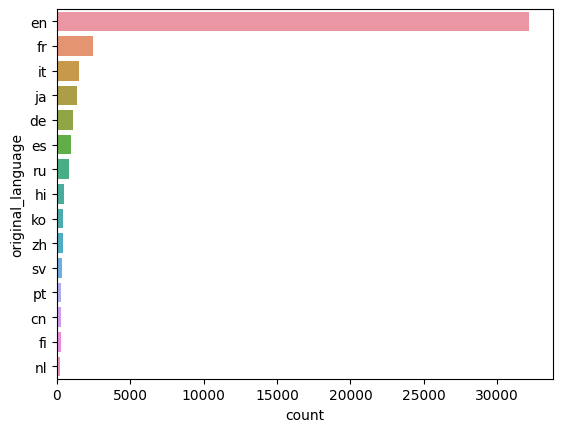

In [8]:
sns.barplot(
    data = cant_de_pelis_por_idioma.head(15),
    x = 'count',
    y = 'original_language'
)

# Preguntas
que pasa si elimino 'en'
cualesserian 
cuantos idiomas tienen solo una peli?


<AxesSubplot: xlabel='count', ylabel='original_language'>

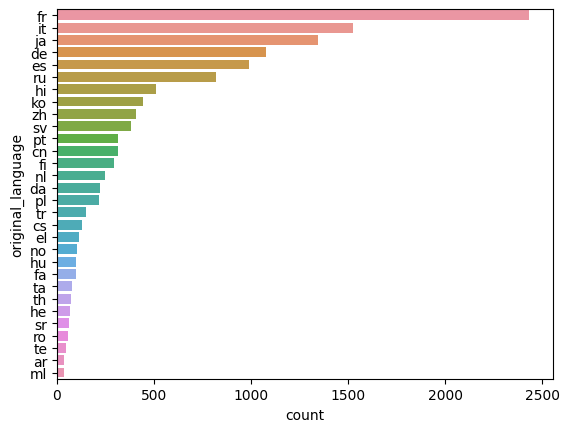

In [9]:
sns.barplot(
    data = cant_de_pelis_por_idioma.drop(0).head(30),
    x = 'count',
    y = 'original_language'
)

In [10]:
cant_de_pelis_por_idioma[cant_de_pelis_por_idioma['count']== 1].sum()

original_language    tguzlasmsirwqumtlbjvhyglfyeocyayzu
count                                                17
dtype: object

<AxesSubplot: xlabel='original_language', ylabel='count'>

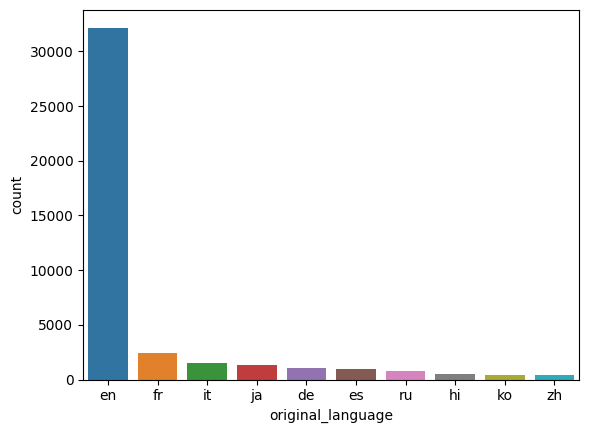

In [11]:
(
    cant_de_pelis_por_idioma.head(10)
    .pipe(
        lambda df: (
            sns.barplot(
                data = df,
                x='original_language',
                y='count'
            )
        )
    )
)

--------------------

EDA


In [16]:
text = sist_recomendacion_df.fillna(' ')
text['title'] = text['title'].astype('str')
stopwords = STOPWORDS


In [17]:
text_title = ' '.join(text['title'])


In [18]:
WC = WordCloud(
    background_color='white',
    stopwords=stopwords,
)

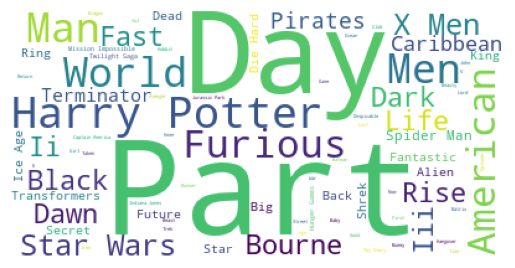

In [19]:
for i in [text_title]:
    WC.generate(i)
    plt.figure()
    plt.imshow(WC)
    plt.axis('off')
    plt.show()

Estas son las palabras que mas veces aparecen en los nombres de las peliculas del dataset reducido que utilizaremos para entrenar el sistema de recomendaciones.